# OOF holography
Te OOF holography computes an aperture distribution model, $\underline{E_\text{a}}(x, y)$, calculates its Fourier transform (voltage reception pattern) and mutiply it by its complex conjugate to form the beam pattern ($P(u, v)$). Then compares it to an observed power pattern, $P^\text{obs}(u, v)$. The comparison is made by a nonlinear least squares minimization. Once the minimum residual is found, the aperture phase distribution can be computed using the Zernike circle polynomials parametrization (see `aperture.ipynb`).

In [1]:
%config InlineBackend.figure_format = 'retina'
%cd ..

C:\Users\Vicente\Documents\pyoof\pyoofClean


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from scipy.constants import golden
from astropy import units as u
import pyoof
from pyoof import aperture, telgeometry
import importlib


In [3]:
pr = 50. * u.m # primary reflector radius

# effelsberg_tel = [blockage, delta, pr, name]
effelsberg_telescope = [
    telgeometry.block_effelsberg(alpha=10 * u.deg),
    telgeometry.opd_effelsberg,
    pr,
    'effelsberg'
    ]

In [4]:
# Data generator to test pyoof
wavel = [9, 12, 15] * u.mm   # wavelength at 32 GHz
d_z = [-2.2, 0., 2.2] * u.cm  # radial offset 

n = 5                                           # initial order
N_K_coeff = (n + 1) * (n + 2) // 2
I_coeff = [1, -14.5 * u.dB, 1.4, 0 * u.m, 0 * u.m]  # illumination coefficients
K_coeff = np.random.normal(0., .08, N_K_coeff)      # random Zernike circle coeff.

In [5]:
# Generated beam data in a fits file
beam_fits, fits_files = pyoof.simulate_data_pyoof_multifreq(
    I_coeff=I_coeff,
    K_coeff=K_coeff,
    wavel_array=wavel,
    d_z=d_z,
    telgeo=effelsberg_telescope[:-1],
    illum_func=aperture.illum_parabolic,
    noise=2000,
    resolution=2 ** 9,
    box_factor=5,
    work_dir=None
    )

development build
development build
development build


In [6]:
#fits_files = ['C:\\Users\\Vicente\\Documents\\pyoof\\pyoofClean\\data_generated\\fits_wavel_9.0 mm.fits',
# 'C:\\Users\\Vicente\\Documents\\pyoof\\pyoofClean\\data_generated\\fits_wavel_11.0 mm.fits',
# 'C:\\Users\\Vicente\\Documents\\pyoof\\pyoofClean\\data_generated\\fits_wavel_13.0 mm.fits']

In [7]:
data = pyoof.extract_data_multifrequency(fits_files)

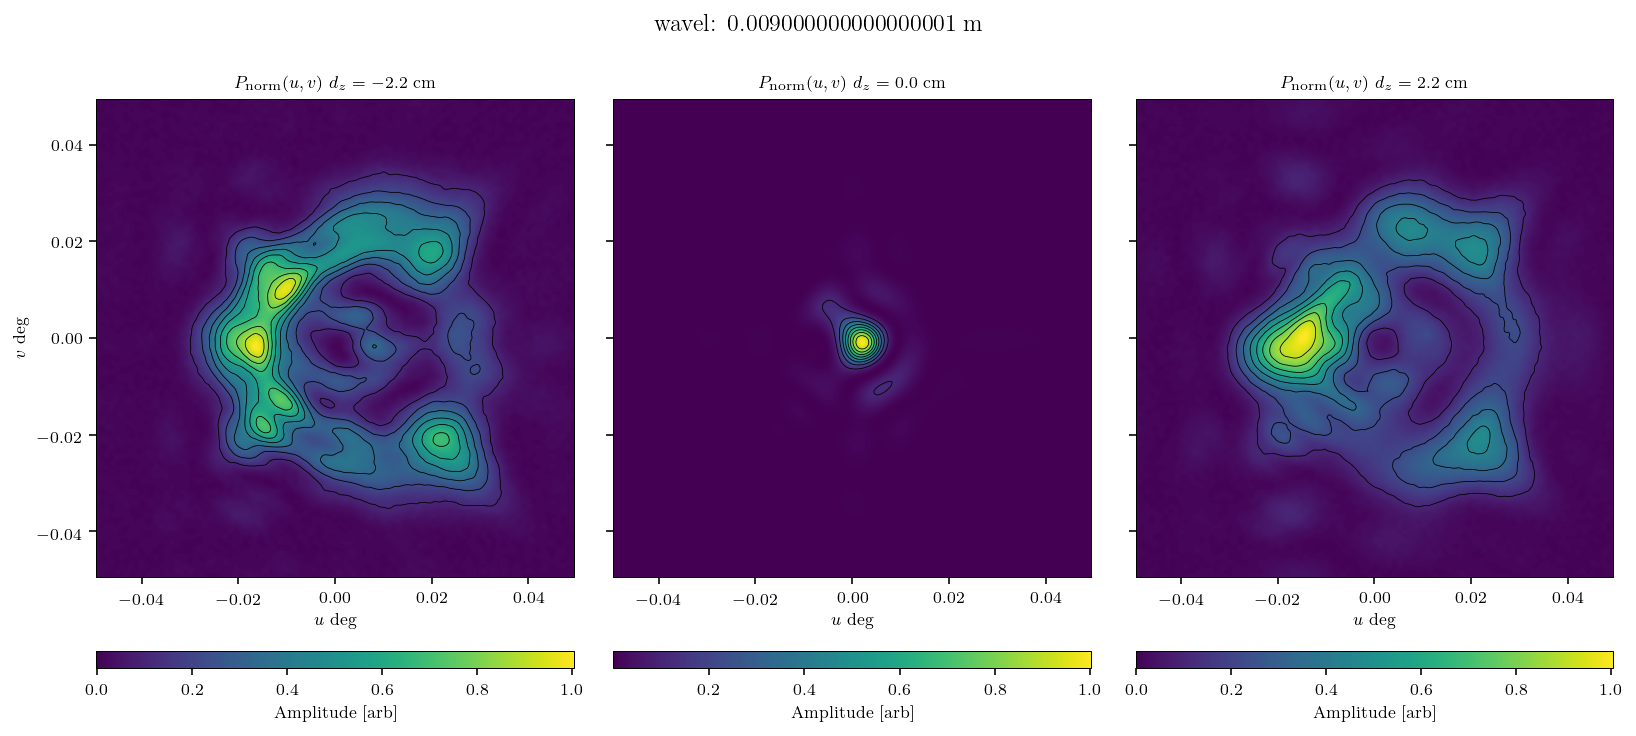

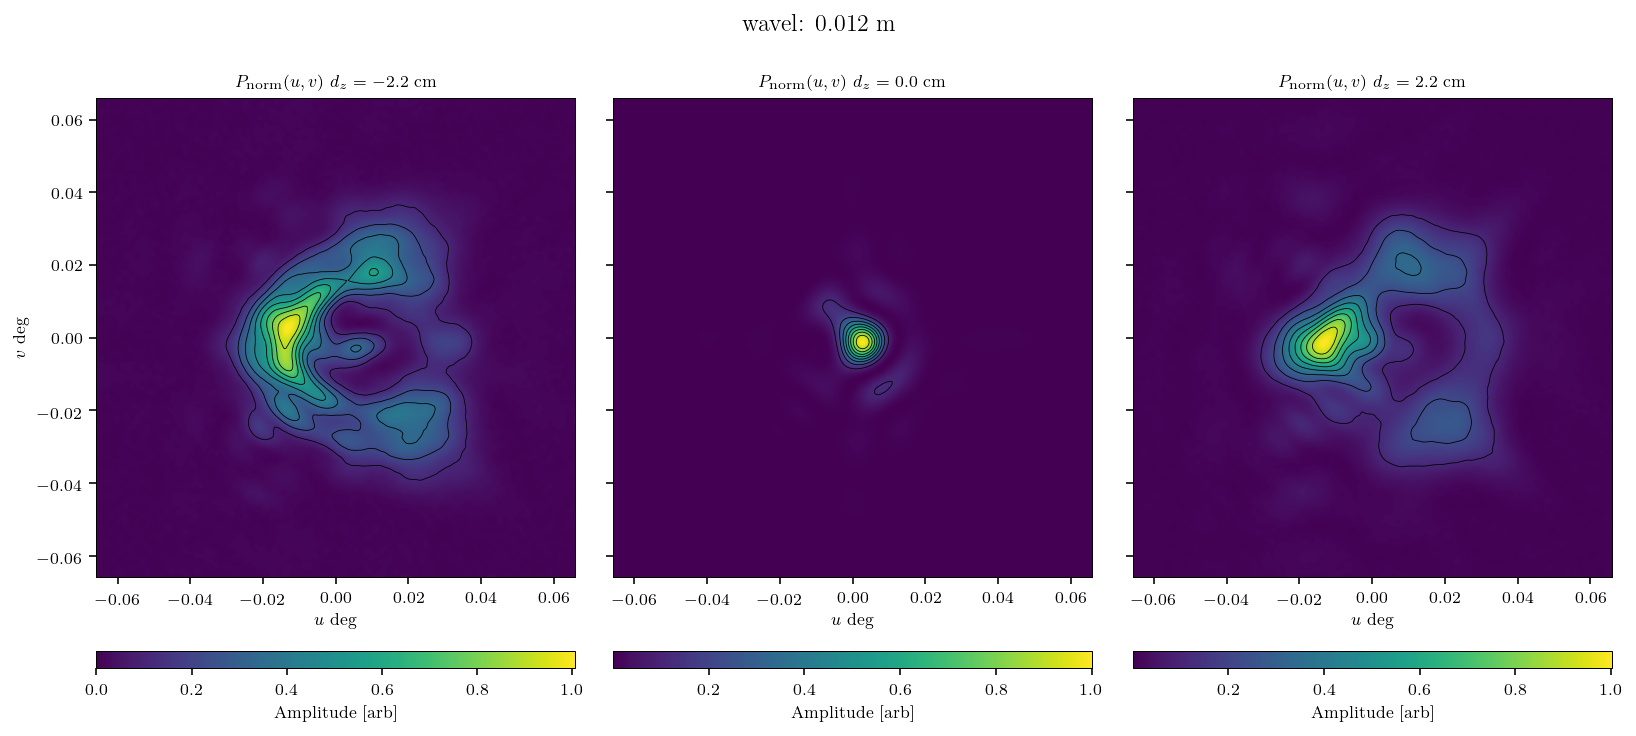

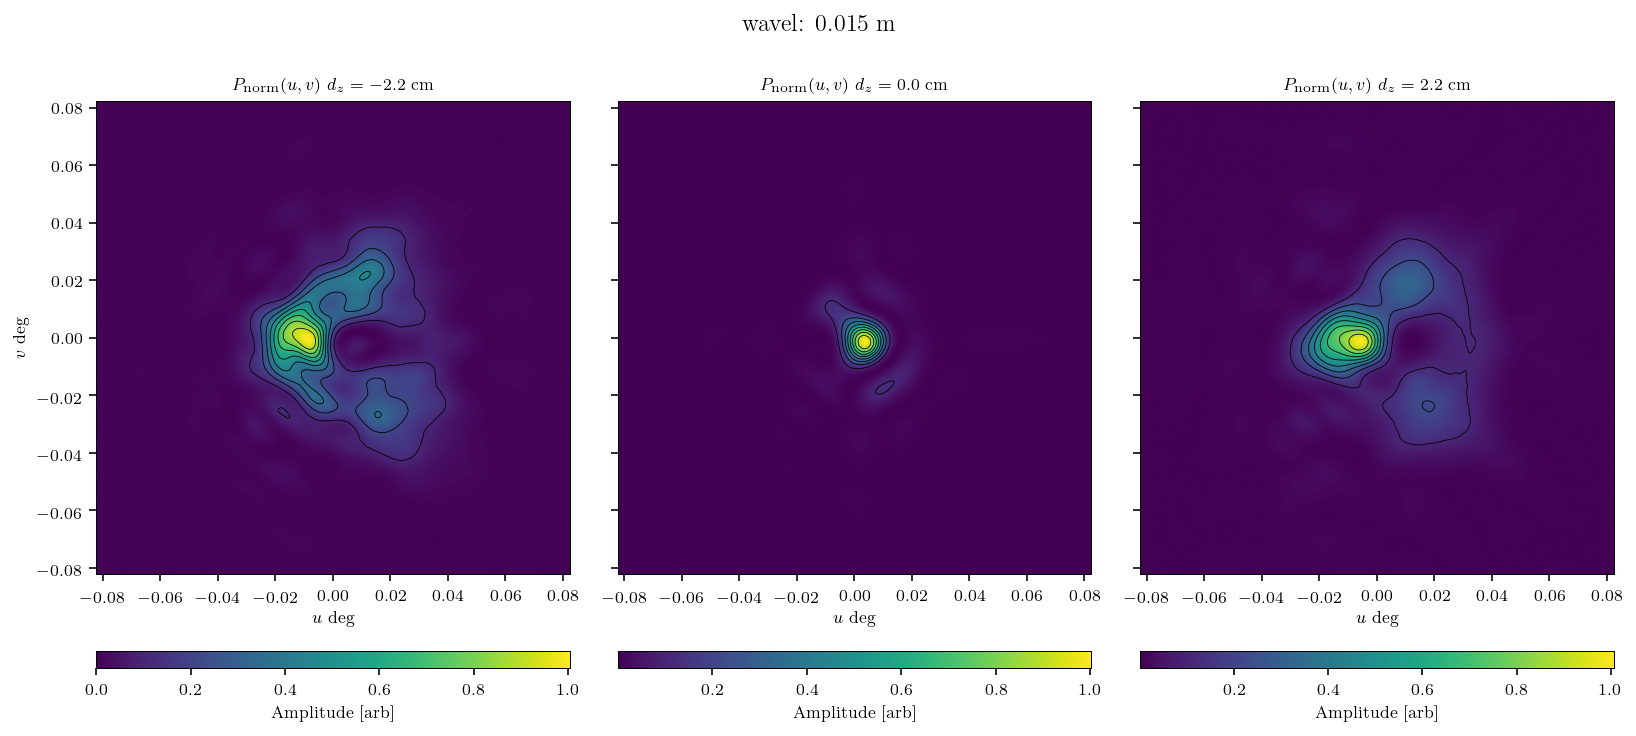

In [8]:
# plotting the generated data
fig1 = pyoof.plot_beam_data_multifrequency(
    data = data,
    angle=u.deg,
    title='',
    resolution=2 ** 8,
    res_mode=False
    )

In [9]:
pyoof.multifrequency_zernike_fit(
    data=data,                   # Information from the observation
    order_max=5,                           # Fit from 1 to order_max
    illum_func=aperture.illum_parabolic,   # Illumination function (or illum_gauss)
    telescope=effelsberg_telescope,        # Telescope properties 
    resolution=2 ** 8,                     # Default is 2 ** 8
    box_factor=5,                          # box_size = 5 * pr, better pixel resolution
    fit_previous=True,                     # True is recommended
    config_params_file=None,               # Default or add path config_file.yaml
    make_plots=True,                            # to not show process
    work_dir=None
    )


 ***** PYOOF FIT POLYNOMIALS ***** 

 ... Reading data ...

Maximum order to be fitted: 5
Telescope name: effelsberg
File name: multi_freq_fit
Illumination to be fitted: illum_parabolic
Obs frequency: 33.310273111111115 GHz
Obs Wavelength: 0.9000000000000001 cm
Mean elevation 0.0 deg
d_z (out-of-focus): [-2.2  0.   2.2] cm
SNR out-, in-, and out-focus beam: [161.88, 5535.37, 168.88]
Beam data shape: (3, 9409)
Obs frequency: 24.98270483333333 GHz
Obs Wavelength: 1.2 cm
Mean elevation 0.0 deg
d_z (out-of-focus): [-2.2  0.   2.2] cm
SNR out-, in-, and out-focus beam: [90.35, 5012.11, 90.41]
Beam data shape: (3, 9409)
Obs frequency: 19.986163866666672 GHz
Obs Wavelength: 1.5 cm
Mean elevation 0.0 deg
d_z (out-of-focus): [-2.2  0.   2.2] cm
SNR out-, in-, and out-focus beam: [98.56, 4526.06, 102.9]
Beam data shape: (3, 9409)

 ... Fit order 1 ... 

Initial parameters: default
Parameters to fit: 3

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
  

       2              3         7.3521e+01      1.42e+01       3.56e-01       1.72e+02    
       3              4         7.2531e+01      9.91e-01       6.23e+00       4.94e+01    
       4              5         7.2325e+01      2.06e-01       8.51e+00       8.07e+01    
       5              6         7.2219e+01      1.06e-01       5.18e-01       1.70e+01    
       6              7         7.2191e+01      2.80e-02       9.58e+00       1.20e+01    
       7              8         7.2179e+01      1.18e-02       2.07e-01       9.09e+00    
       8              9         7.2172e+01      6.66e-03       5.67e-03       7.41e+00    
       9             10         7.2168e+01      4.33e-03       1.69e-03       6.13e+00    
      10             11         7.2166e+01      2.31e-03       9.56e+00       8.12e+00    
      11             12         7.2163e+01      2.80e-03       4.37e-01       3.97e+00    
      12             13         7.2162e+01      1.43e-03       2.70e-03       3.54e+00    

Now looking into the created `data_generated/pyoof_out` directory, there are several files from the fit. The `pyoof.beam_generator` routine, creates a file stored in the `data_generated` directory, this is `test000.fit`, if the routine is called again it will make another file `test001.fits`. Same for the `pyoof.fit_beam`, if excecuted twice, then there will be another directory `data_generated/pyoof_out/test000-001`, and so on. Please keep that in mind.

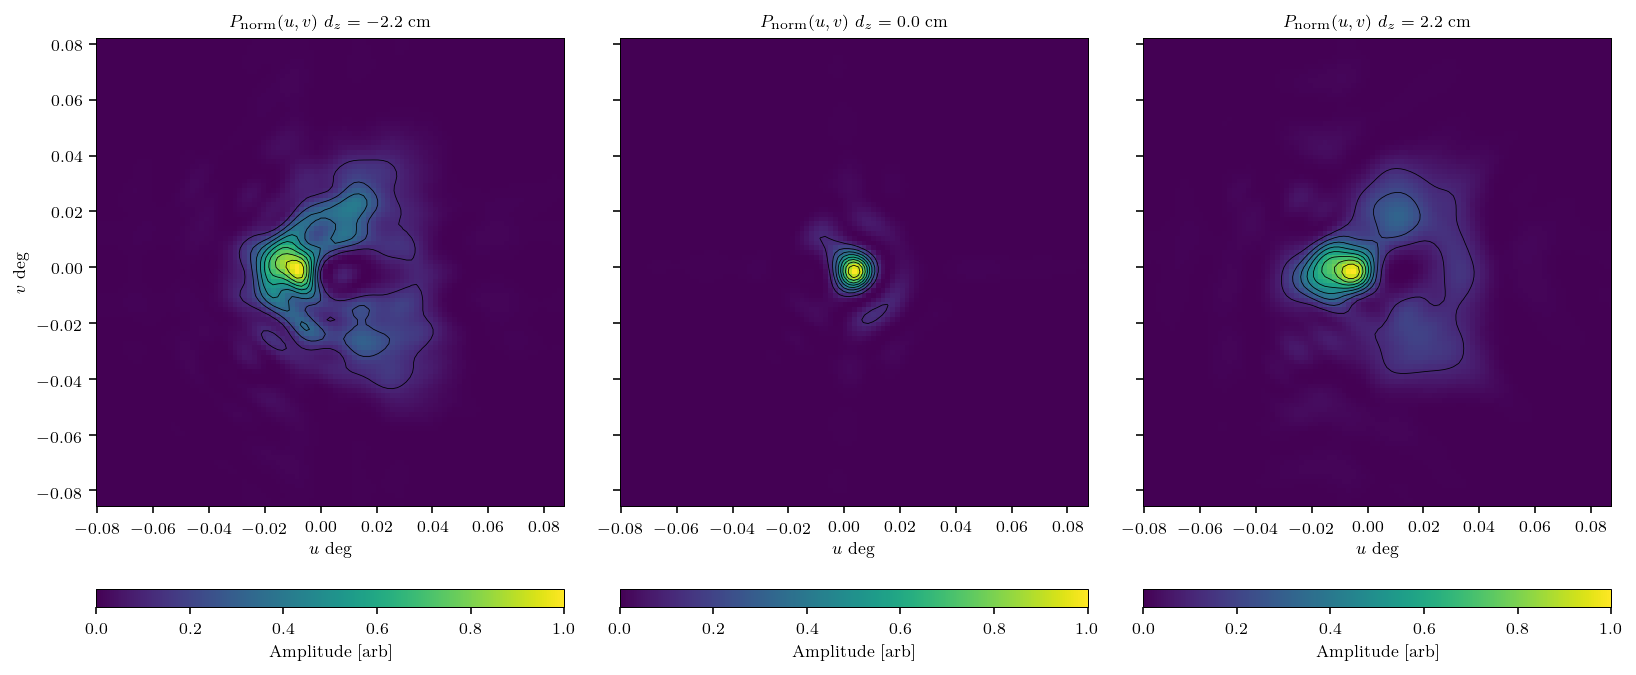

In [10]:
params = Table.read(
    'C://Users/Vicente/Documents/pyoof/pyoofClean/data_generated/pyoof_out/multi_freq_fit-000/fitpar_n5.csv',
    format='ascii'
    )['parfit']


fig = pyoof.plot_beam(
    I_coeff=params[:5],
    K_coeff=params[5:],
    title='',
    d_z=d_z,
    wavel=wavel[2],
    illum_func=aperture.illum_parabolic,
    telgeo=effelsberg_telescope[:-1],
    plim=None,
    angle=u.deg,
    resolution=2 ** 8,
    box_factor=5
    )

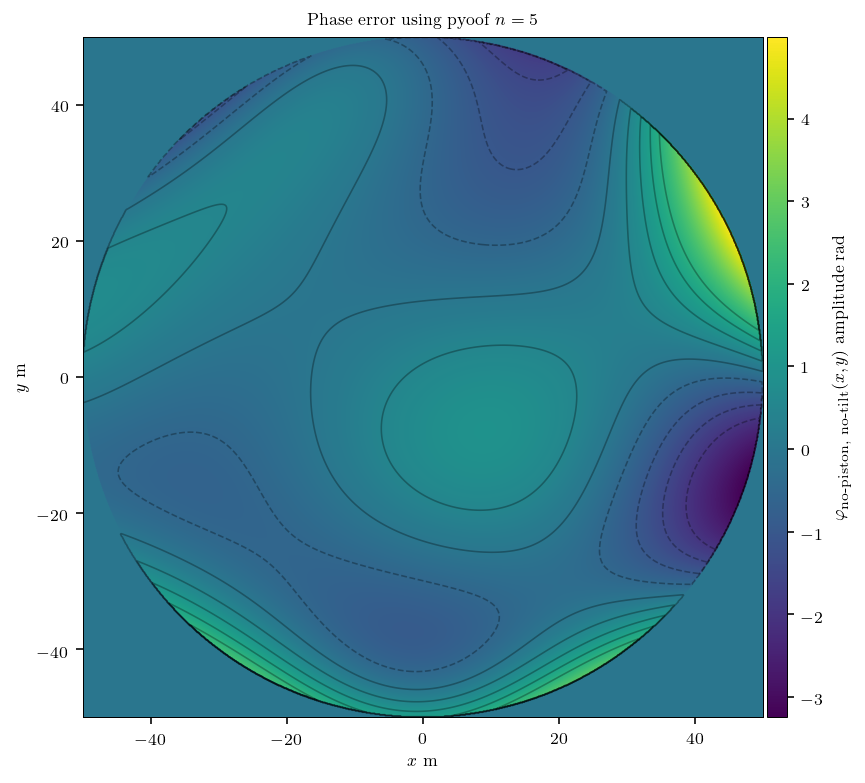

In [15]:
# using the solution from the pyoof
plt.close(fig)
fig1 = pyoof.plot_phase(
    K_coeff=params[5:],
    piston=False,
    tilt=False,
    pr=pr,
    title='Phase error using pyoof $n=5$'
    )

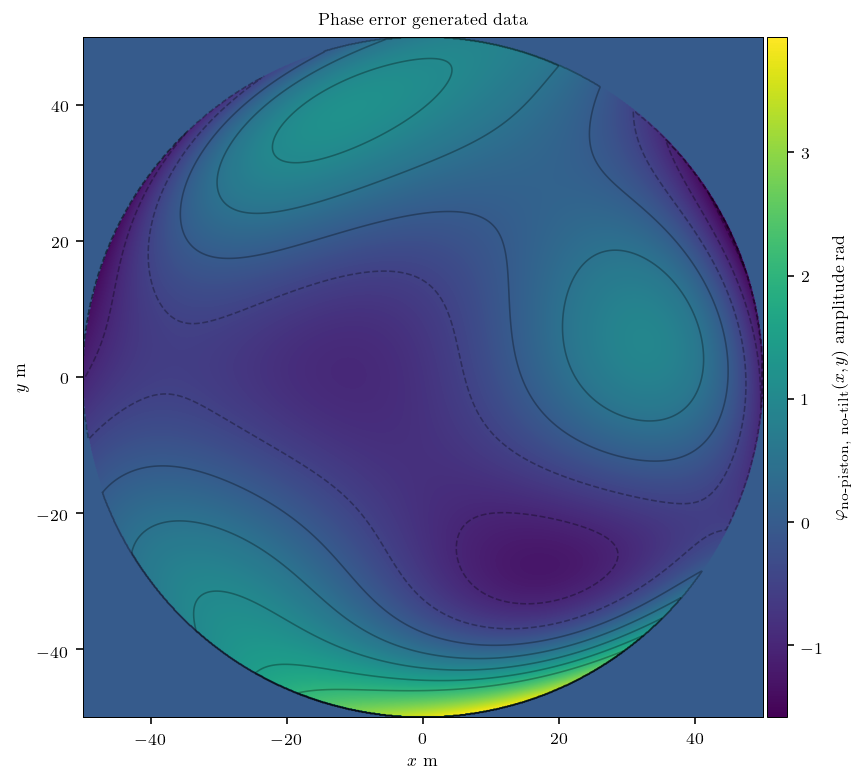

In [16]:
# using the coefficients given to generate data
plt.close(fig1)
fig2 = pyoof.plot_phase(
    K_coeff=K_coeff,
    piston=False,
    tilt=False,
    pr=pr,
    title='Phase error generated data'
    )

The above solutions corresponds to the aperture phase distribution, computed with the solution of the `pyoof` package and with the given (random) coefficients to generate data. There is a small difference between the two methods, the user is encourage to test different configurations with different noise level.